In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn import datasets 
from sklearn import metrics 
from sklearn.preprocessing import StandardScaler

In [2]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [3]:
df = pd.read_csv("housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,class_family
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY,1
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY,2
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY,3
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY,1
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY,2


In [4]:
df.keys()

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'class_family'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
 10  class_family        20640 non-null  int64  
dtypes: float64(4), int64(6), object(1)
memory usage: 1.7+ MB


In [6]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
class_family            0
dtype: int64

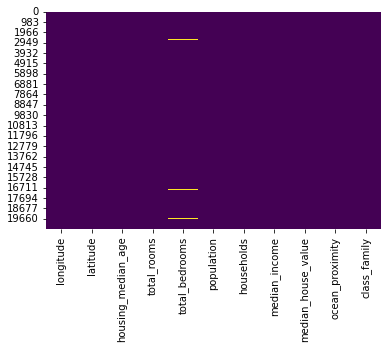

In [7]:
sns.heatmap(df.isnull(), cbar = False, cmap = 'viridis')
plt.show()

In [8]:
df.total_bedrooms = df.total_bedrooms.fillna(df.total_bedrooms.mean())
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,class_family
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY,1
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY,2
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY,3
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY,1
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY,2


In [9]:
X_train = df[['longitude', 'latitude', 'total_rooms'
       , 'median_income']][:500]

In [10]:
X_train.head()

,longitude,latitude,total_rooms,median_income
0,-122.23,37.88,880,8.3252
1,-122.22,37.86,7099,8.3014
2,-122.24,37.85,1467,7.2574
3,-122.25,37.85,1274,5.6431
4,-122.25,37.85,1627,3.8462


In [11]:
y_train = df['median_house_value']

In [12]:
y_train.head()

0    452600
1    358500
2    352100
3    341300
4    342200
Name: median_house_value, dtype: int64

In [13]:
#KNR = KNeighborsRegressor(10)
#KNR.fit(X_train,y_train)

In [14]:
X = df[['latitude','longitude']]
y = df['median_house_value']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [16]:
KNR = KNeighborsRegressor(20)
KNR.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=20)

In [17]:
KNR.predict(X_test)

array([125000., 205625., 151265., ..., 229830., 228810., 270180.])

In [18]:
#OR

In [19]:
prices_df = df[(df['ocean_proximity'] == 'NEAR BAY')]

In [20]:
prices_df = prices_df.groupby(["population","latitude","longitude"], as_index=False)["median_house_value"].mean()
prices_df.head()


,population,latitude,longitude,median_house_value
0,8,37.39,-122.06,375000.0
1,13,37.50,-122.14,500001.0
2,13,37.79,-122.50,500001.0
3,18,37.81,-122.29,67500.0
4,19,38.00,-122.49,400000.0


In [21]:
X = prices_df[['latitude','longitude']]
y = prices_df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


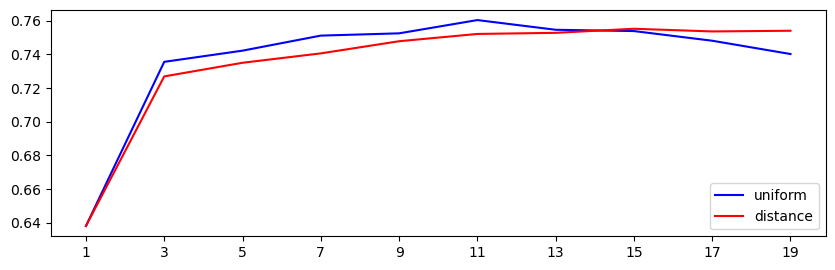

In [22]:
uniform  = []
distance = []
r = range (1,21,2)

for k in r:
    
    # Euclidan, 'straight' distance
    model = KNeighborsRegressor(n_neighbors = k, weights='uniform')
    model.fit(X_train.values, y_train.values)
    uniform.append(model.score(X_test.values,y_test.values))

    # Distance is inversely proportional (to lessen the weight of outliers)
    model = KNeighborsRegressor(n_neighbors = k, weights='distance') 
    model.fit(X_train.values, y_train.values)
    distance.append(model.score(X_test.values,y_test.values))

uniform = np.array(uniform)
distance = np.array(distance)

plt.rcParams['figure.figsize'] = [10, 3]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
plt.plot(r,uniform,label='uniform',color='blue')
plt.plot(r,distance,label='distance',color='red')
plt.legend()
plt.gca().set_xticks(r)
plt.show()


In [23]:
pd.DataFrame({"k" : r, "uniform" : uniform, "distance" : distance})


,k,uniform,distance
0,1,0.637942,0.637942
1,3,0.735559,0.726894
2,5,0.742209,0.735000
3,7,0.751156,0.740588
4,9,0.752504,0.747810
5,11,0.760395,0.752147
6,13,0.754631,0.752810
7,15,0.753859,0.755231
8,17,0.748112,0.753637
9,19,0.740210,0.754048


In [34]:
#A way of shuffling the training data set -cross-validation.
#GridSearchCV function _combines both the ability to define the no of splits and iterate through various hyperparameters.
params = {'n_neighbors':range(1,21,2),'weights':['uniform','distance']}

model = GridSearchCV(KNeighborsRegressor(), params, cv=15)
model.fit(X_train.values,y_train.values)
model.best_params_


{'n_neighbors': 9, 'weights': 'uniform'}

In [35]:
model.score(X_test.values,y_test.values)


0.7525038846629161

In [36]:
def price(description,lat,lon):
    features = [[lat,lon]]
    print("{:30s} -> {:5.0f}k ".format(description,float(model.predict(features))))

# Examples
price('Oxford Circus, London', 51.515276, -0.142038)
price('Harrods (B. Road), London', 51.499814, -0.163366)
price('Peak District, National Park', 53.328508, -1.783416)


Oxford Circus, London          -> 218111k 
Harrods (B. Road), London      -> 218111k 
Peak District, National Park   -> 218111k 
